In [1]:
from __future__ import print_function
import os
data_path = ['../Data']

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import utils

In [3]:
#split the data into test and train 
#use the file feature_engineered.csv
from sklearn.model_selection import train_test_split
filepath_feat_eng = os.sep.join(data_path + ['feature_engineered.csv'])
feat_eng = pd.read_csv(filepath_feat_eng, header =0, index_col =[0])
train,test = train_test_split(feat_eng,test_size = 0.3,random_state = 100)
x_train = train.drop('genre', axis=1)
y_train = train['genre']
x_test = test.drop('genre', axis =1)
y_test = test['genre']

In [4]:
feat_eng.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,-0.305190,1.081472,0.335174,-1.802354,-0.033418,0.547961,1.209559,0.520177,5
3,-0.414637,0.309857,0.981693,-1.826925,-0.555945,2.734133,0.105597,-0.594694,5
5,-1.271315,1.446562,0.571875,-1.830157,1.242922,0.261302,-0.650787,0.683372,5
10,1.080124,0.988641,1.359970,0.870650,-0.484161,-0.539885,-0.330577,1.923387,10
134,-0.213157,0.229133,0.073484,-1.777677,-0.626228,3.136317,-0.253287,1.671279,5


In [5]:
feat_eng.genre.unique()

array([ 5, 10,  4,  8, 11,  2,  7,  0,  1,  9,  6,  3])

In [13]:
print(x_train.head(2))
print(x_test.head(2))
print(y_train.head(2))
print(y_test.head(2))

          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
14803        -0.987414      0.775381 -0.792494          0.655185 -0.366001   
48294         0.012895      0.715360  0.941187          0.099926 -0.800577   

          speechiness     tempo   valence  
track_id                                   
14803       -0.542812  0.391383 -1.361277  
48294       -0.471868 -0.653422  0.477427  
          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
879          -0.648865      0.106118  0.535015          0.571363 -0.792385   
527           1.192089     -0.791674  0.860852          0.602686 -0.672309   

          speechiness     tempo   valence  
track_id                                   
879          0.028630  1.495742 -0.253306  
527         -0.315277  0.815232  1.803881  
track_id
14803    2
48

In [7]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)

/Users/dishaumarwani/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
accuracy_xgb = accuracy_score(y_test,y_predicted)
print('The accuracy achieved with XGBClassifier is', accuracy_xgb)

0.651585322408


[[  0   0   1   0   9   1   0   0   0   0   0  11]
 [  0  59   0   0  19   0   0   0   1   5   0   7]
 [  0   3 417   0  17  25   0   0   1   1   1 198]
 [  0   0   0   0   1   1   0   0   0   0   0   4]
 [  0  14  14   0 104  11   0   0   2   2   2 123]
 [  0   0  56   0   1 163   0   0   0   0   0  40]
 [  0   0   8   0   2   1   0   0   1   0   0  15]
 [  0   0   4   0   6   2   0   3   0   0   1  20]
 [  0   6   9   0   9   5   0   0   1   0   0  42]
 [  0   5   1   0   2   0   0   2   0  98   0   1]
 [  0   0  22   0   9   5   0   0   2   0   0  65]
 [  0   2  82   0  47  27   0   1   1   2   0 984]]


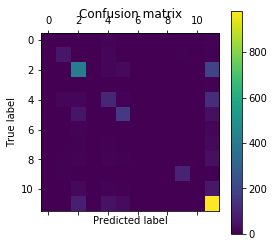

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predicted)
print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Confusion matrix, without normalization
[[  0   0   1   0   9   1   0   0   0   0   0  11]
 [  0  59   0   0  19   0   0   0   1   5   0   7]
 [  0   3 417   0  17  25   0   0   1   1   1 198]
 [  0   0   0   0   1   1   0   0   0   0   0   4]
 [  0  14  14   0 104  11   0   0   2   2   2 123]
 [  0   0  56   0   1 163   0   0   0   0   0  40]
 [  0   0   8   0   2   1   0   0   1   0   0  15]
 [  0   0   4   0   6   2   0   3   0   0   1  20]
 [  0   6   9   0   9   5   0   0   1   0   0  42]
 [  0   5   1   0   2   0   0   2   0  98   0   1]
 [  0   0  22   0   9   5   0   0   2   0   0  65]
 [  0   2  82   0  47  27   0   1   1   2   0 984]]


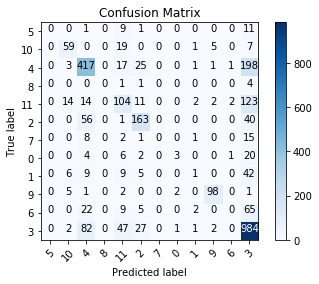

In [10]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

class_names = feat_eng.genre.unique()

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                    #  title='Normalized confusion matrix')

plt.show()

In [11]:
#import statement
from sklearn.linear_model import LogisticRegression
clf_LogReg = LogisticRegression(C = 1e30)
clf_LogReg.fit(x_train, y_train)
y_predicted = clf_LogReg.predict(x_test)
accuracy_lg = accuracy_score(y_test,y_predicted)
print(accuracy_lg)

0.596366227289


In [12]:
clf_SVC = SVC(kernel = "linear", probability = True)
clf_SVC.fit(x_train, y_train)
y_predicted = clf_SVC.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_predicted)
print(accuracy_svc)

0.612753829711


In [20]:
clf_SVC = SVC(kernel='rbf')
clf_SVC.fit(x_train, y_train)
y_predicted = clf_SVC.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_predicted)
print(accuracy_svc)

0.642322764517


In [21]:
clf_SVC = SVC(kernel='poly', degree=3, C=1.0)
clf_SVC.fit(x_train, y_train)
y_predicted = clf_SVC.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_predicted)
print(accuracy_svc)

0.62023512647
